In [1]:
# Early-stopping is used to find out best epoch value to overcome "Overfitting" problem

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

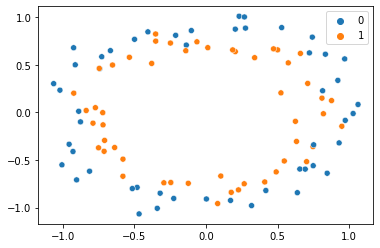

In [4]:
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 2)

In [7]:
model = Sequential()

model.add(Dense(256, input_dim = 2, activation = 'relu'))   # 256 node in the hidden layer
model.add(Dense(1, activation = 'sigmoid'))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss= 'binary_crossentropy',optimizer = 'adam', metrics= ['accuracy'])

In [11]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 2500,verbose = 0)
# verbose = 0 for not showing the output
# here we use the epoch = 2500 

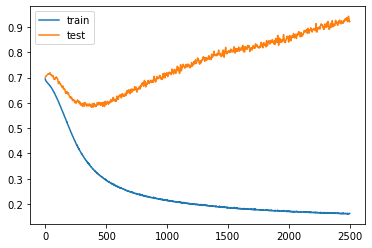

In [13]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

In [14]:
# the orange line show the "overfitting" at certain point

3888/3888 [==============================] - 5s 1ms/step


TypeError: ignored

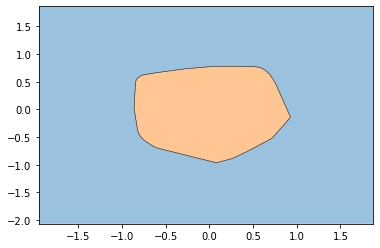

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()

** Early Stopping **

```
# This is formatted as code
```



In [17]:
model = Sequential()

model.add(Dense(256, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])


In [20]:
# ** Callback **

In [21]:
callback = EarlyStopping(
    monitor="val_loss",    # work on the val_loss and accuracy function
    min_delta=0.00001, 
    patience=20,             
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [22]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 1s 82ms/step - loss: 0.6914 - accuracy: 0.5500 - val_loss: 0.6962 - val_accuracy: 0.4500
Epoch 2/3500
3/3 [==============================] - 0s 17ms/step - loss: 0.6893 - accuracy: 0.5375 - val_loss: 0.6993 - val_accuracy: 0.4000
Epoch 3/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6881 - accuracy: 0.5625 - val_loss: 0.7019 - val_accuracy: 0.4000
Epoch 4/3500
3/3 [==============================] - 0s 20ms/step - loss: 0.6871 - accuracy: 0.5375 - val_loss: 0.7035 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6859 - accuracy: 0.5500 - val_loss: 0.7045 - val_accuracy: 0.4000
Epoch 6/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6854 - accuracy: 0.5375 - val_loss: 0.7054 - val_accuracy: 0.4000
Epoch 7/3500
3/3 [==============================] - 0s 16ms/step - loss: 0.6848 - accuracy: 0.5375 - val_loss: 0.7067 - val_accuracy: 0.4000
Epoch 8/3500


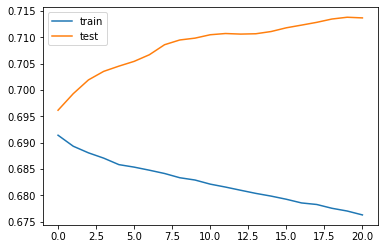

In [23]:
plt.plot(history.history['loss'],label = 'train')
plt.plot(history.history['val_loss'],label = 'test')
plt.legend()
plt.show()

In [25]:
# in this graph we observe that "epoch cycle" stop at 20 

3888/3888 [==============================] - 6s 1ms/step


TypeError: ignored

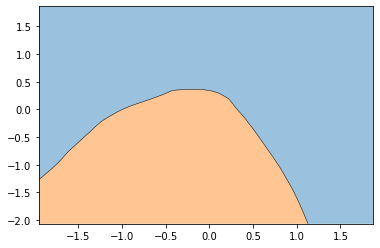

In [24]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend=2)
plt.show()